In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
from sklearn.metrics import f1_score
from sklearn import metrics

In [43]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression

In [44]:
pca = pd.read_csv('df_pca_no_income.csv')
pca

,Unnamed: 0,Comp 1,Comp 2,Comp 3,VCode
0,0,0.338869,1.818014,-0.627183,11
1,1,-0.529109,0.545410,-1.055522,2
2,2,-0.683115,0.559931,-0.772899,2
3,3,-0.913999,1.121206,-1.401985,2
4,4,-0.468879,0.102517,-0.201110,2
...,...,...,...,...,...
292673,292673,-0.984167,-0.399751,-0.769544,2
292674,292674,-0.626376,-1.244239,0.402679,2
292675,292675,1.470554,0.445038,-0.350033,11
292676,292676,1.837977,-0.864417,0.212281,11


In [45]:
pca = pca.drop(['Unnamed: 0'], axis =1)
pca

,Comp 1,Comp 2,Comp 3,VCode
0,0.338869,1.818014,-0.627183,11
1,-0.529109,0.545410,-1.055522,2
2,-0.683115,0.559931,-0.772899,2
3,-0.913999,1.121206,-1.401985,2
4,-0.468879,0.102517,-0.201110,2
...,...,...,...,...
292673,-0.984167,-0.399751,-0.769544,2
292674,-0.626376,-1.244239,0.402679,2
292675,1.470554,0.445038,-0.350033,11
292676,1.837977,-0.864417,0.212281,11


In [46]:
x1 = pca[['Comp 1', 'Comp 2', 'Comp 3']]
#x = df3[['Violation Time','Violation Code', 'Violation County','IssueDate']]
y1 = pca['VCode']

In [47]:
X_trains, X_tests, Y_trains, Y_tests = train_test_split(
    x1.values,
    y1.values, 
    test_size = 0.2,
    random_state=20
)

print(X_trains.shape, Y_trains.shape)
print(X_tests.shape, Y_tests.shape)

(234142, 3) (234142,)
(58536, 3) (58536,)


In [109]:
lr = linear_model.LinearRegression()
lr.fit(X_trains, Y_trains)
lr.score(X_trains, Y_trains)

0.8465261967900172

In [110]:
preds = lr.predict(X_tests)

In [113]:
dframe = pd.DataFrame({'Actual':Y_tests,'Predict':preds})
#print('Accuracy score', metrics.accuracy_score(Y_tests, preds))
dframe

,Actual,Predict
0,8,7.795520
1,4,3.077622
2,4,4.001080
3,8,7.002703
4,4,4.443673
...,...,...
58531,10,8.817580
58532,12,12.041361
58533,4,2.804130
58534,4,3.602609


In [114]:
r2 = metrics.r2_score(Y_tests, preds)
r2

0.855272852848808

In [116]:
print('MAE', metrics.mean_absolute_error(Y_tests, preds))
print('MSE', metrics.mean_squared_error(Y_tests, preds))
print('RMSE', np.sqrt(metrics.mean_squared_error(Y_tests, preds)))
print('R squared error', metrics.r2_score(Y_tests, preds))

MAE 0.9202448900782888
MSE 1.9734442531074037
RMSE 1.404793313305343
R squared error 0.855272852848808


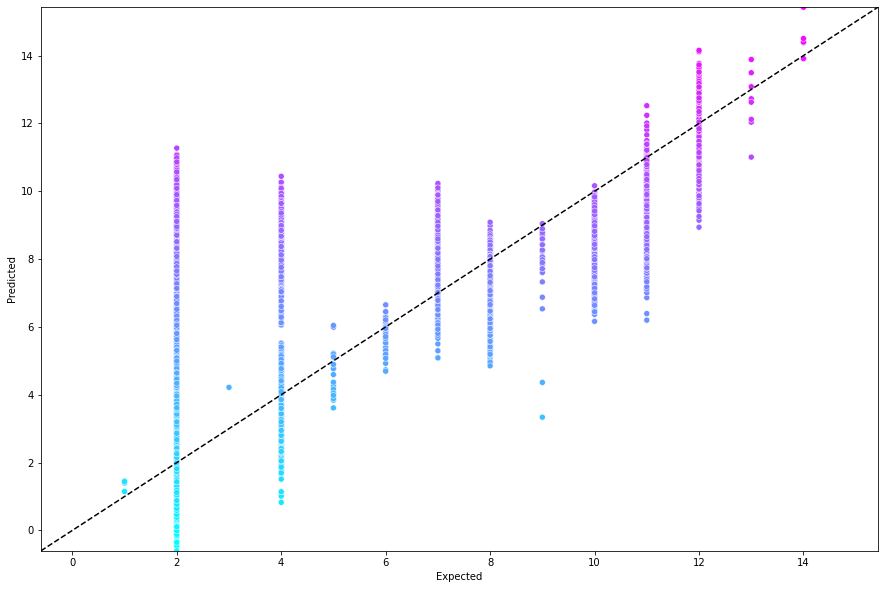

In [56]:
de = pd.DataFrame()

de['Expected']  = pd.Series(Y_tests)
de['Predicted'] = pd.Series(preds)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=de, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(Y_tests.min(), preds.min())
end   = max(Y_tests.max(), preds.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

In [18]:
g = lr.predict(np.array([0.3345,0.546, 0.409]).reshape(1,-1))

In [22]:
round(g[0])

7

In [23]:
import numpy as np
def PCA_input(input1, input2, input3, input4):
    pca = np.array([[ 0.00285211, -0.92271639,  0.35675341, -0.14599089],
           [ 0.01207291,  0.37399345,  0.73673076, -0.56321483],
           [-0.02380599, -0.0933087 , -0.57393259, -0.81322085]])
    result_input = (np.array([[input1 / 805, input2 / 15, input3 / 7, input4 / 4256]]) * pca).sum(axis=1)
    return result_input

In [40]:
h = PCA_input(2,4,3,6)
print(h)

[-0.09336211  0.41470933 -0.27205903]


In [27]:
lr.predict(h.reshape(1,-1))

array([6.59051006])

In [28]:
import pickle

In [29]:
filename = 'finalized_model.sav'
pickle.dump(lr, open(filename, 'wb'))

In [30]:
with open('model_pkl', 'wb') as files:
    pickle.dump(lr, files)

In [32]:
pickle.dump(lr, open('model2.pkl','wb'))

In [34]:
coefficients = lr.coef_
coefficients

array([ 2.33702797,  0.90700057, -0.35386196])

In [36]:
intercept = lr.intercept_
intercept

6.336286985018424

In [37]:
pickle.dump(lr, open('model3.pkl','wb'))

In [38]:
model = pickle.load(open('model3.pkl','rb'))

In [39]:
print(model.predict([[2, 9, 6]]))

[17.05017634]


In [67]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

Decision Tree

In [117]:
dec_tree = DecisionTreeClassifier()
dec_tree = dec_tree.fit(X_trains, Y_trains)
dec_tree.score(X_trains, Y_trains)

1.0

In [118]:
dec_tree_pred = dec_tree.predict(X_tests)

In [119]:
dframe = pd.DataFrame({'Actual':Y_tests,'Predict':dec_tree_pred})
print('Accuracy score', metrics.accuracy_score(Y_tests, dec_tree_pred))
print("Recall      : ", metrics.recall_score(Y_tests, dec_tree_pred, average='weighted'))
print("Precision   : ", metrics.precision_score(Y_tests, dec_tree_pred, average='weighted'))
print("F1 Score    : ", metrics.f1_score(Y_tests, dec_tree_pred, average='weighted'))
print("MCC    : ", metrics.matthews_corrcoef(Y_tests, dec_tree_pred))
dframe

Accuracy score 0.7989442394423945
Recall      :  0.7989442394423945
Precision   :  0.7990233126711586
F1 Score    :  0.7989705594507551
MCC    :  0.745315134371961


/Users/gudmundurjonasson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Actual,Predict
0,8,8
1,4,4
2,4,4
3,8,2
4,4,4
...,...,...
58531,10,10
58532,12,12
58533,4,2
58534,4,4


KNN

In [120]:
#KNEIGHBOURSCLASSIFIER
neigh = KNeighborsClassifier()
neigh.fit(X_trains, Y_trains)
neigh.score(X_trains, Y_trains)

0.8751825815103655

In [121]:
neigh_pred = neigh.predict(X_tests)

In [122]:
dframe = pd.DataFrame({'Actual':Y_tests,'Predict':neigh_pred})
print('Accuracy score', metrics.accuracy_score(Y_tests, neigh_pred))
print("Recall      : ", metrics.recall_score(Y_tests, neigh_pred, average='weighted'))
print("Precision   : ", metrics.precision_score(Y_tests, neigh_pred, average='weighted'))
print("F1 Score    : ", metrics.f1_score(Y_tests, neigh_pred, average='weighted'))
print("MCC    : ", metrics.matthews_corrcoef(Y_tests, neigh_pred))
dframe

Accuracy score 0.8310270602706027
Recall      :  0.8310270602706027
Precision   :  0.8276126644775972
F1 Score    :  0.8285509950277794
MCC    :  0.7858789459836522


/Users/gudmundurjonasson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Actual,Predict
0,8,8
1,4,4
2,4,4
3,8,8
4,4,4
...,...,...
58531,10,10
58532,12,12
58533,4,4
58534,4,4


Random Forest

In [123]:
rfc = RandomForestClassifier()
rfc = rfc.fit(X_trains, Y_trains)
rfc.score(X_trains, Y_trains)

0.9999829163499073

In [124]:
rfc_pred = rfc.predict(X_tests)

In [125]:
dframe = pd.DataFrame({'Actual':Y_tests,'Predict':rfc_pred})
print('Accuracy score', metrics.accuracy_score(Y_tests, rfc_pred))
print("Recall      : ", metrics.recall_score(Y_tests, rfc_pred, average='weighted'))
print("Precision   : ", metrics.precision_score(Y_tests, rfc_pred, average='weighted'))
print("F1 Score    : ", metrics.f1_score(Y_tests, rfc_pred, average='weighted'))
print("MCC    : ", metrics.matthews_corrcoef(Y_tests, rfc_pred))
dframe

Accuracy score 0.8493405767391007
Recall      :  0.8493405767391007
Precision   :  0.8471748430303765
F1 Score    :  0.8474221953599242
MCC    :  0.8095874054687281


/Users/gudmundurjonasson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Actual,Predict
0,8,8
1,4,2
2,4,4
3,8,8
4,4,4
...,...,...
58531,10,10
58532,12,12
58533,4,4
58534,4,4


Save the best model

In [78]:
pickle.dump(rfc, open('rfc_model.pkl','wb'))

GaussianNB

In [126]:
gnb = GaussianNB()
gnb = gnb.fit(X_trains, Y_trains)
gnb.score(X_trains, Y_trains)

0.6449248746487174

In [127]:
gnb_pred = gnb.predict(X_tests)

In [128]:
dframe = pd.DataFrame({'Actual':Y_tests,'Predict':gnb_pred})
print('Accuracy score', metrics.accuracy_score(Y_tests, gnb_pred))
print("Recall      : ", metrics.recall_score(Y_tests, gnb_pred, average='weighted'))
print("Precision   : ", metrics.precision_score(Y_tests, gnb_pred, average='weighted'))
print("F1 Score    : ", metrics.f1_score(Y_tests, gnb_pred, average='weighted'))
print("MCC    : ", metrics.matthews_corrcoef(Y_tests, gnb_pred))
dframe

Accuracy score 0.6499248325816591
Recall      :  0.6499248325816591
Precision   :  0.6323496792767044
F1 Score    :  0.6331630365068049
MCC    :  0.5565364568733572


/Users/gudmundurjonasson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Actual,Predict
0,8,8
1,4,2
2,4,4
3,8,8
4,4,4
...,...,...
58531,10,10
58532,12,12
58533,4,2
58534,4,4


In [87]:
from sklearn.model_selection import cross_val_score
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_trains, Y_trains, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

/Users/gudmundurjonasson/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Scores: [0.84612428 0.84855862 0.8478688  0.84979072 0.84633125 0.84616042
 0.8474417  0.84688648 0.84620313 0.84141966]
Mean: 0.8466785056679953
Standard Deviation: 0.002093819509870386


In [88]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regy = regressor.fit(X_trains, Y_trains)
regy.score(X_trains, Y_trains)

1.0

In [89]:
regy_pred = regy.predict(X_tests)

In [90]:
dframe = pd.DataFrame({'Actual':Y_tests,'Predict':regy_pred})
print('Accuracy score', metrics.accuracy_score(Y_tests, regy_pred))
dframe

Accuracy score 0.7991150744840781


,Actual,Predict
0,8,8.0
1,4,2.0
2,4,4.0
3,8,8.0
4,4,4.0
...,...,...
58531,10,10.0
58532,12,12.0
58533,4,4.0
58534,4,4.0


In [131]:
# initialize list of lists
data = [['Random Forest', 0.849, 0.809], ['KNN', 0.831, 0.786],['Decision Trees', 0.799, 0.745],
       ['GaussianNB', 0.649, 0.557], ]
  
# Create the pandas DataFrame
res = pd.DataFrame(data, columns=['Classifier', 'Accuracy', 'MCC'])
  
# print dataframe.
res

,Classifier,Accuracy,MCC
0,Random Forest,0.849,0.809
1,KNN,0.831,0.786
2,Decision Trees,0.799,0.745
3,GaussianNB,0.649,0.557


In [132]:
# initialize list of lists
data = [['Linear Regression', 0.86, 0.92, 1.97, 1.41]]
  
# Create the pandas DataFrame
res = pd.DataFrame(data, columns=['', 'R squared error', 'MAE', 'MSE', 'RMSE'])
  
# print dataframe.
res

,,R squared error,MAE,MSE,RMSE
0,Linear Regression,0.86,0.92,1.97,1.41


In [ ]:
dframe = pd.DataFrame({'Actual':Y_test,'Predict':rfc_pred})
print('Accuracy score', metrics.accuracy_score(Y_test, rfc_pred))
print("Recall      : ", metrics.recall_score(Y_test, rfc_pred, average='weighted'))
print("Precision   : ", metrics.precision_score(Y_test, rfc_pred, average='weighted'))
print("F1 Score    : ", metrics.f1_score(Y_test, rfc_pred, average='weighted'))
dframe